In [1]:
import tensorflow as tf
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Get the data from the public MNIST library
Each sample is a $28\times28$ picture of handwritten numbers.  
The dataset will have dimension $N\times28\times28$

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train/255.0, x_test/255.0

# Report dimensions
print('Training dataset:',x_train.shape)
print('Testing dataset:',x_test.shape)

Training dataset: (60000, 28, 28)
Testing dataset: (10000, 28, 28)


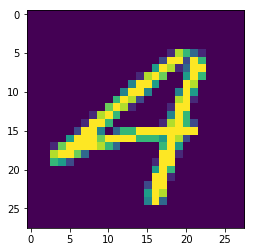

In [14]:
# choose a random sample
ind = randint(0,x_train.shape[0])

# Plot the sample
fig, ax = plt.subplots()
ax.imshow(x_train[ind,:,:])
ax.grid()
plt.show()

In [15]:
# Build the model
model = tf.keras.models.Sequential([
                 tf.keras.layers.Flatten(input_shape=(28, 28)),
                 tf.keras.layers.Dense(512, activation=tf.nn.relu),
                 tf.keras.layers.Dense(100, activation=tf.nn.relu),
                 tf.keras.layers.Dense(10, activation=tf.nn.softmax) ])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training
from time import time
t_old = time()
print('Training...')
history = model.fit(x_train, y_train, epochs=10,
                    verbose=0)
print('...Done in %ss'%(time()-t_old))
model.save('mnist.h5')

Training...
...Done in 53.13473320007324s


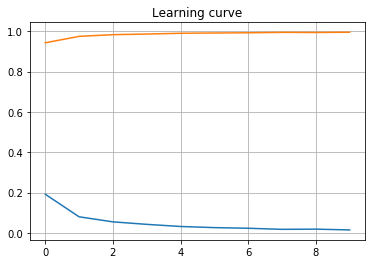

In [18]:
# plot learning curve
err = history.history['loss']
acc = history.history['accuracy']
fig, ax = plt.subplots()
ax.plot(err,label='loss')
ax.plot(acc,label='accuracy')
ax.set_title('Learning curve')
plt.show()

In [19]:
loss,acc = model.evaluate(x_test, y_test,verbose=0)
print('accuracy:',acc)

accuracy: 0.9812


In [20]:
# Show Results
predictions = model.predict(x_test)

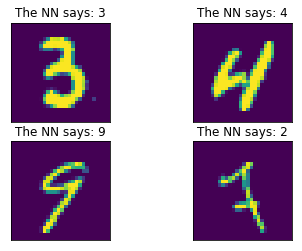

In [24]:
# 4 Random examples
samples = [randint(0,x_test.shape[0]) for _ in range(4)]

fig, ax = plt.subplots()
gs = gridspec.GridSpec(2, 2)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])

axs = [ax0,ax1,ax2,ax3]
for i in range(len(samples)):
   ax = axs[i]
   ind = samples [i]
   img = x_test[ind,:,:]
   label = y_test[ind]
   predicted = np.argmax(predictions[ind])
   ax.imshow(img)
   ax.set_xticks([])
   ax.set_yticks([])
   ax.set_title('The NN says: %s'%(predicted))
plt.show()